<a href="https://colab.research.google.com/github/StevenXJiang/ISEN-370-Spring-2022-Project-2/blob/main/ISEN_370_Project_2_Demo.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# ISEN 370 Project 2 Demonstration 
In this demo, you will be shown how to use data science tools to study sampling distributions and ocnstruct confidence interval. <br>
The next section provides some tips that can be used in this Markdown document.


# Markdown can work with Latex to type math symbols and formulas.
To embed LaTeX within text, simply encapsulate the LaTeX portions in dollar signs (\$). MathJax takes care of the rest. 
For instance, Einstein told us that $E = mc^2$ is done using Einstein told us that \$E = mc^2\$.
* You can put formulas centered in their own lines using double \$\$ characters. <br>
* Greek letter MU is represented by \mu <br>
* subscription is done using "_" <br>
* not equal to is represented by \neq <br>
* Use \<br> for a new line

<br>
<br>
Following is a list of some symbols you may find useful in this class.

LaTeX | symbol
--- | :---: 
`\mu` | $\mu$ 
`\sigma` | $\sigma$ 
`\alpha` | $\alpha$ 
`\frac{b}{a}` | $\frac{b}{a}$ 
`\a^2` | $a^2$ 
`\approx` | $\approx$ 
`\sim` | $\sim$ 
`\propto` | $\propto$
`\le` | $\le$
`ge` | $\ge$
`\pm` | $\pm$
`\in` | $\in$
`\ln` | $\ln$
`\exp` | $\exp$
`\prod_{i\in D}` | ${\displaystyle \prod_{i\in D}}$
`\sum_{i\in D}` | ${\displaystyle \sum_{i\in D}}$
`\frac{\partial f}{\partial x}` | ${\displaystyle \frac{\partial f}{\partial x}}$
`\sqrt{x}` | $\sqrt{x}$
`\bar{x}` | $\bar{x}$


# Import Libraries
We will need to import necessary libraries for the project. 
*  Numpy is The fundamental package for scientific computing with Python. 
*  Pandas is a data analysis and manipulation tool.  
*  Matplotlib is Matplotlib is a comprehensive library for creating static, animated, and interactive visualizations in Python.
*  SciPy provides algorithms for optimization, integration, interpolation, eigenvalue problems, algebraic equations, differential equations, statistics and many other classes of problems.
*  Seaborn is a Python data visualization library based on matplotlib. It provides a high-level interface for drawing attractive and informative statistical graphics.
*  Python has a built-in module that you can use to calculate mathematical statistics of numeric data.
*  Python has a built-in module that you can use for mathematical tasks.






 


In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
import statistics as stat
import math as math
from scipy.stats import t
from scipy.stats import chi2

## Data Import

The Learning Enhanced Watershed Assessment System (LEWAS) is a unique real-time water and weather monitoring system. The LEWAS monitoring site is installed at the outfall of the Webb Branch watershed on Virginia Tech’s campus. Webb Branch is an urban stream with a 2.78 square kilometer (about one square mile) watershed consisting of residential and commercial properties. The stream is routed through man-made channels and culverts until it discharges at the LEWAS monitoring site.
We first import the LEWAS datasets and print the first 10 rows of data. The data is stored in CSV files for which the path is given in the cell below.
The CSV file contains data from 9/28/2016-9/30/2016.

read.csv() is a function in pandas that allows us read csv file.
df.head() is a funciton that can be applied to a dataframe to display the first n number of records. So df1.head(10) will display first 10 records for dataframe df1.
<br> Notice we have three variables: Date and Time, Water Temperature (F), Estimated Flow Rate (m3/s).

In [2]:
data_url1='https://github.com/StevenXJiang/DataScienceModule2/raw/main/LEWAS_Storm_Data_Demo_1.csv'


In [3]:
df1=pd.read_csv(data_url1)
df1.head(10)

,Date and Time,Water Temperature (F),Estimated Flow Rate (m3/s)
0,9/28/16 1:00 PM,64.562,0.073
1,9/28/16 1:01 PM,64.544,0.072
2,9/28/16 1:02 PM,64.544,0.073
3,9/28/16 1:03 PM,64.562,0.073
4,9/28/16 1:04 PM,64.544,0.070
5,9/28/16 1:05 PM,64.544,0.072
6,9/28/16 1:06 PM,64.544,0.068
7,9/28/16 1:07 PM,64.544,0.071
8,9/28/16 1:08 PM,64.580,0.070
9,9/28/16 1:09 PM,64.562,0.070


Let's focus on water temperature. We will create a new dataframe that only contains water temperature.

In [4]:
df2=df1['Water Temperature (F)']

# Exploring Data

Let's investigate the distribution of the variable water temperature. <br>
We use displot() in seaborn to get the distribution shape. This function provides access to several approaches for visualizing the univariate or bivariate distribution of data, including subsets of data defined by semantic mapping and faceting across multiple subplots. The kind parameter selects the approach to use: "hist" is the default. We will use the default to get a histogram for the temperature data.

##Histogram

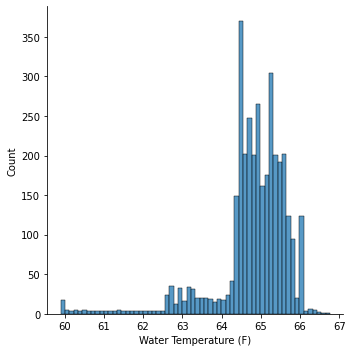

In [ ]:
sns.displot(df2)

***Comment on the shape of the distribution.***
<br>
***Answer:***
<br> The distribution of the water temperature for year 2016 is skewed to the left. It certainly does not have a normal distribution.

#Box plot
Box plots can be used to check if there are outliers in the data set and can also be used to check for normality.

DataFrame.boxplot(column=, grid=True, ...) can be used to generate boxplots for selected columns. use column= to specify the columns you would like to use to create boxplots and use grid=Fasle to not display grids (by default it is True).



Generate Boxplot for water temperature in year 2016.

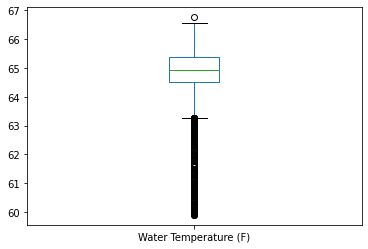

In [ ]:
boxplot1 = df1.boxplot(column=["Water Temperature (F)"],grid=False)

***Comment on the boxplots. Are there any outliers?*** 
<br>
***Answer:*** <br>
There are many outliers for water temperture in year 2016 

## Sampling Distribution

Now, let's build sampling distribution for the mean of water temperature. 

First, let's create an array that represents the population using to_numpy() function.

In [ ]:
a1=df2.to_numpy()

The sampling distribution consists of sample means from many samples of a certian size. We will build a function to randomly sample the population based on the sample size and number of samples.

The function is named sample_mean_calculator() and has three parameters: population_array, sample_size, and n_samples. population_array is the population. In our case, it would be a1. sample size is the number of observations in each sample. We will change the sample size and study the impact on the distribution. n_samples provides the number of samples.

First, we define sample_means as an empty list [].
We then use a loop to get each of the n samples.
For each sample, we randomly generate a sample of size sample_size.
The NumPy random choice() function is used to gets the random samples of a one-dimensional array which returns as the random samples of NumPy array. The NumPy random choice() function is a built-in function in the NumPy package of python.
We calculate the sample mean for each sample using stat.mean() function and add it to the sample_means list.

In [ ]:
def sample_mean_calculator(population_array, sample_size, n_samples):
  sample_means = []
  for i in range(n_samples):
    sample = np.random.choice(population_array, size=sample_size, replace=False)
    sample_mean = stat.mean(sample)
    sample_means.append(sample_mean)
  return sample_means

Let's generate a sampling distribution using sample size 10 and  10 samples.
Visualize the distribution of the data using sns.displot().

In [ ]:
s0=pd.Series(sample_mean_calculator(a1, 10, 10), name="Water Temperature (\N{DEGREE SIGN}F)")

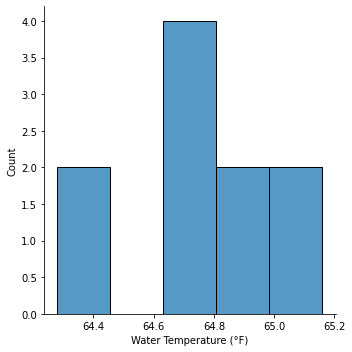

In [ ]:
sns.displot(s0)

Let's try sample size 30, and 10000 samples.

In [ ]:
s1=pd.Series(sample_mean_calculator(a1, 30, 10000), name="Water Temperature (\N{DEGREE SIGN}F)")

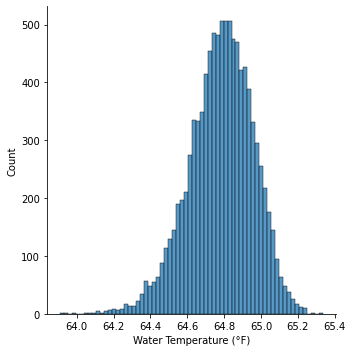

In [ ]:
sns.displot(s1)

Let's try sample size of 100, 10000 samples.

In [ ]:
s2=pd.Series(sample_mean_calculator(a1, 100, 10000), name="Water Temperature (\N{DEGREE SIGN}F)")

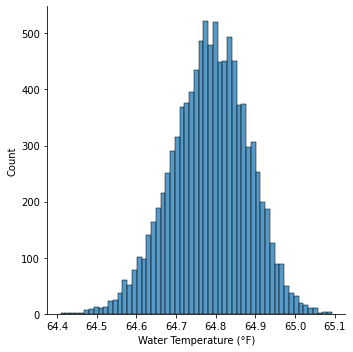

In [ ]:
sns.displot(s2)

Now, recall the famous central limit theorem, with large enough sample sizes, we can assume the sampling distribution of the means will be normally distributed. This can allow us to run statistical tests that are configured for normal distributions (Most of the most popular statistical tests are configured this way). For instance, a statistical test, the "t-test" allows us to infer whether two samples come from different populations (say, an experimental group and a control group). Thanks to the central limit theorem, we can use this test even if we have no idea what the underlying distribution of the population is, which is most of the time.

## Using Sampling Distribution of the Mean and Vairance to Do Calculation

Assuming the population mean (mean water temperature in 2016) is 64.  The variance for a sample of 10 observations is 4. What is the probability of the mean water temperature is greater than 63.2?

Test statistic for the sampling distribution of mean is t.<br>
$t=\frac{x̄-μ}{\sqrt\frac{s^2}{n-1}}$ with degree of freedom n-1.

The cumulative distribution function (CDF) of a real-valued random variable X, or just distribution function of X, evaluated at x, is the probability that X will take a value less than or equal to x: $P(X<x)$.<br>
In this case, $\mu=64$, $s^2=4$, and $n=10$.<br>

$P(\bar X>63.2)=1- P(\bar x<63.2)$<br><br>

$t=\frac{63.2-64}{\sqrt\frac{4}{10-1}}$. <br>

In [5]:
t1=(63.2-64)/math.sqrt(4/(10-1))

$P(\bar X>63.2)=1-P(\bar X <63.2)$

In [6]:
#calculate p-value
1-t.cdf(x=t1, df=9)

0.8696134013047685

 What is the probability of the mean water temperature is greater than 63.2? <br>
 Answer:  The probability of the mean water temperature is greater than 63.2 is 0.87.

Assume the variance of the water temperature in 2016 is 9. What is the probability that the sample variance is less than 3?



Test statistic for sampling distribution of variance is $\chi^2$. <br>
$\chi^2=\frac{(n-1)s^2}{\sigma^2}$ with degree of freedom n-1. <br>
In this case, n=10, $s^2=4, \sigma^2=9$. <br>
$\chi^2=\frac{(10-1) 4}{9}$, $df=10-1=9$ <br>
$P(\sigma^2<3)=P(\chi^2<4)$

In [ ]:
c1=(10-1)*4/9

In [ ]:
chi2.cdf(c1, 9)

0.08858747316832083

What is the probability that the sample variance is less than 3? <br>
Answer: The probability that the sample variance is less than 3 is 0.09.

##Confidence Interval
The (1-α)% confidence interval provides a range of values that you can be (1-α)% confident contains/captures the true mean of the population. Due to natural sampling variability, the sample mean (center of the CI) will vary from sample to sample.

Practically, it usually is near impossible to study the entire population. Researchers can only work on samples of the population and estimate parameters of the popultion using sample statistics.Therefore, a confidence interval is simply a way to measure how well the sample represents the population. 

It is important to point out that the confidence is in the **method**, not in a particular interval. If we repeat the sampling method many times, approximately 95% of the intervals constructed would **capture** the true population mean.

Therefore, as the sample size increases, the range of interval values will be narrower, meaning that the estimation being more accurate compared with a smaller sample.
<br>
<br>
In this project, we can construct confidence interval based on the sample data collected.
<br>
From the histogram and bloxplot, we have already estabished that the data is not normally distributed. However, give the large sample size, using <b> the central limit theorem</b>, we know the sampling distribution of the mean will follow a normal distribution. The following code will generate the 95% confidence interval for the mean water temperatue for year 2016. The code will generate the upper level and lower level of the confidence interval based on the sample.

stats.norm.interval(alpha=,loc=scale=) function is used to genetate the confidence interval. alpha provides the significance level, 1-alpha is the confidence, loc is the mean and scale is the standard deviation of the sample mean.

numpy.mean() function provides the sample mean and stats.sem() computes the sandard error of the mean.

Let's randomly select a sample of 100 observations from the population (water temperature).

In [ ]:
data=np.random.choice(df2, size=100, replace=False)

Since we are working with a large sample (n >30), we can use the normal.interval() function from the scipy.stats library to calculate a confidence interval for a population mean.

In [ ]:
stats.norm.interval(alpha=0.95, loc=np.mean(data), scale=stats.sem(data)) 

(64.53263004374635, 64.93912995625364)

***Interpret the confidence interval you generated.***
<br>
***Answer:***
<br> There is 95% chance that the interval (64.53263004374635, 64.93912995625364) will capture the true mean water temperature for year 2016.